### Zomato Data Analysis project

In [1]:
# importing liberaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('Zomato data .csv')

In [6]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### What we have to answer from the given data
- 1. what type of restaurant do the majority of customers order from?
  2. How many votes has each type of restaurant received from customers?
  3. What are the ratings that the majority of restaurants have received?
  4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?
  5. Which mode (online or offline ) has received the maximum rating?
  6. Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?

In [7]:
type(data)

pandas.core.frame.DataFrame

In [9]:
df = data

### lets check data is good / perfect or not

In [10]:
df.shape

(148, 7)

In [12]:
df.info()  #all data is available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [13]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [14]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [15]:
df['rate']

0      4.1/5
1      4.1/5
2      3.8/5
3      3.7/5
4      3.8/5
       ...  
143    3.3/5
144    3.3/5
145    4.0/5
146    3.0/5
147    3.9/5
Name: rate, Length: 148, dtype: object

In [ ]:
# converting the data type of column

In [26]:
def changeRate(x):
    value = x.split('/')
    rate = value[0];
    return rate


In [28]:
df['rate'] = df['rate'].apply(changeRate)

In [30]:
#.what type of restaurant do the majority of customers order from?

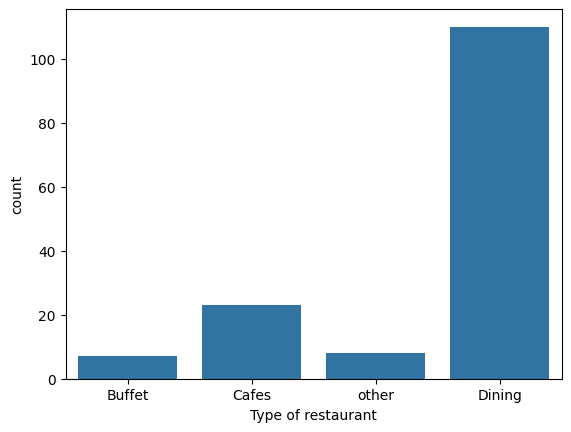

In [38]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of restaurant')
plt.show()

### Concusion - majority of customers order from Dining restaurant

2.How many votes has each type of restaurant received from customers?

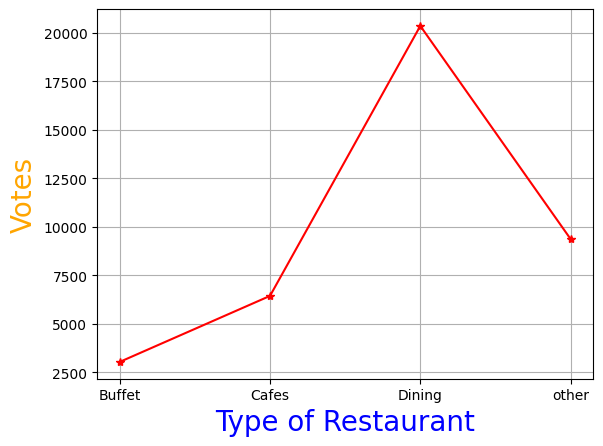

In [45]:
group = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':group})
plt.plot(result, c="red", marker='*')
plt.xlabel("Type of Restaurant", c='blue', size=20)
plt.ylabel("Votes", c='orange',size=20)
plt.grid()
plt.show()

### Conclusion - Dinning Restaurant Received highest votes

In [46]:
# 3.What are the ratings that the majority of restaurants have received?

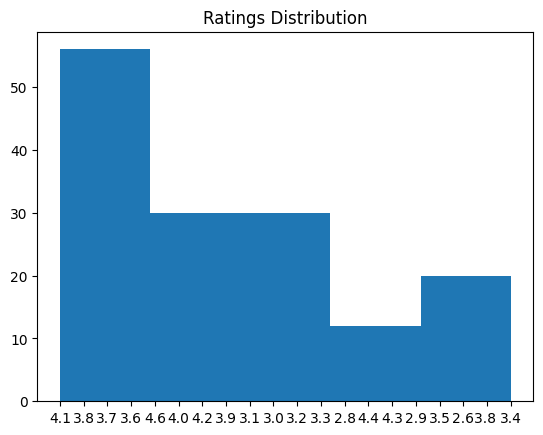

In [49]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

### Conclusion - most of the Restaurant received rating from 3.5 to 4.1

In [ ]:
# 4. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [51]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

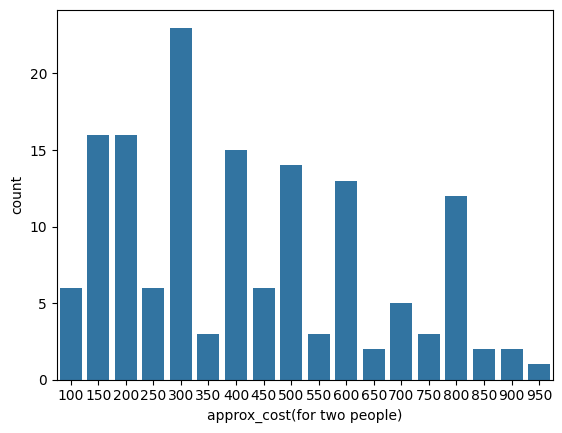

In [58]:
couple = df['approx_cost(for two people)']
sns.countplot(x=couple)

### Conclusion - couples average spending on food is 300

In [59]:
# 5.Which mode (online or offline ) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='count'>

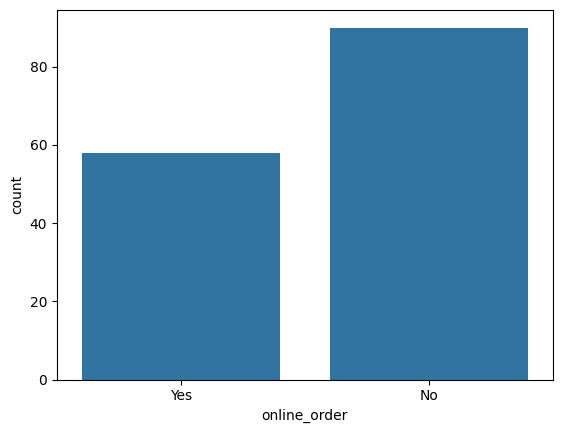

In [72]:
order = df['online_order']
sns.countplot(x=order)

<Axes: xlabel='online_order', ylabel='rate'>

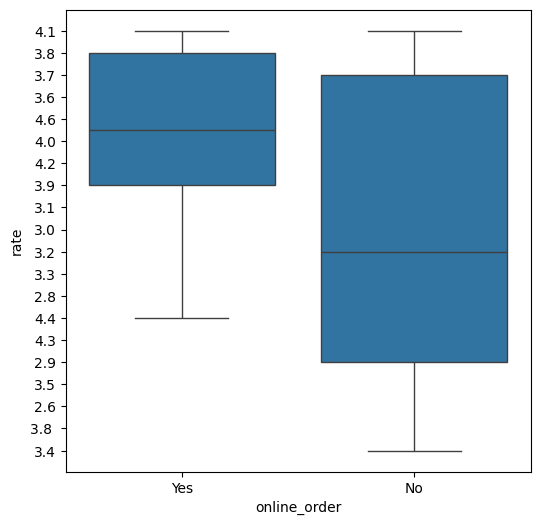

In [73]:
plt.figure(figsize = (6,6))
sns.boxplot(x='online_order', y = 'rate', data= df)

### Conclusion - offline order receives lower rating as compared to online

In [74]:
# 6.Which type of restaurant received more offline orders, so that Zomato can provide customers with some good offers?

In [75]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [79]:
offline=df[df['online_order']=='No']['listed_in(type)'].value_counts()

In [84]:
offline

listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
Name: count, dtype: int64

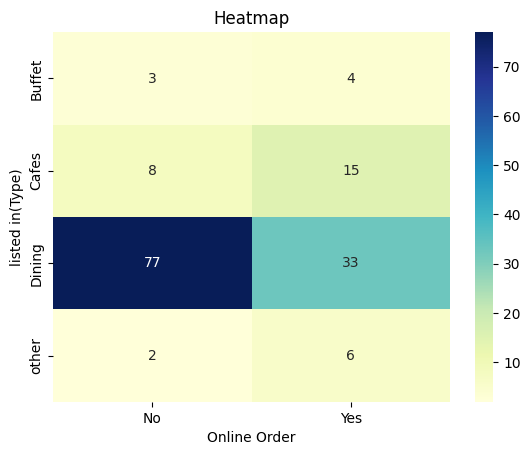

In [86]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("listed in(Type)")
plt.show()

In [88]:
### CONCLUSION : Dinning Restaurants primarily accept offline orders , whereas cafes primarily receive online orders. This suggests that clients preferes
### orders in person at restaurants, but prefer online ordering at cafes.